In [32]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud 
import warnings
warnings.filterwarnings("ignore")

In [372]:
#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile(r"PythonHackathon/V02Max_Combined.xlsx")
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')

## Qn1. Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.


In [36]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn2. Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly


In [190]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


## Qn33. Create a list and a tuple. Print the types and lengths of both.


In [42]:
# Create a List and tuple
List=[1,2,3,4,5,6,7,8,9,10,11,12]
print(List)
tuple=(10,20,30,40,50,60,70,80,90,10,20)
print(tuple)

#Print the types of both.
print(type(list))
print(type(tuple))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
(10, 20, 30, 40, 50, 60, 70, 80, 90, 10, 20)
<class 'type'>
<class 'tuple'>


## Qn34. Display a word cloud using any values in the dataset



# Installing 

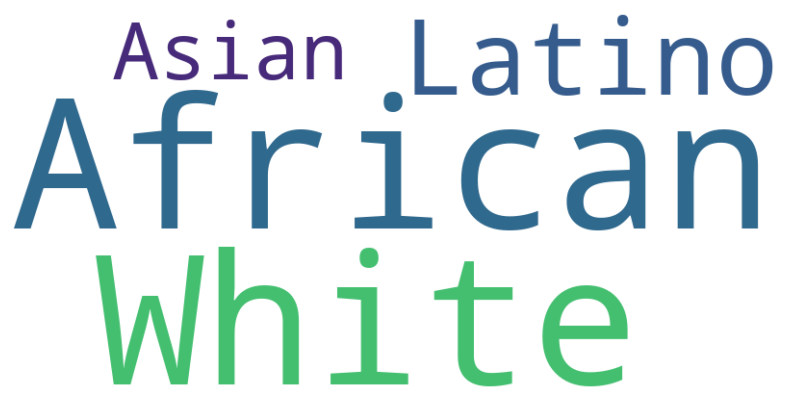

In [128]:

!pip install wordcloud
from wordcloud import WordCloud
wcloud = pd.DataFrame(ath)
text = ' '.join(wcloud[''])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Qn35. Create a Regression Plot on Max V02 and mean BMI for any sport of your choice
 

0        1492.157428
1        1492.157428
2        1492.157428
3        1492.157428
4        1492.157428
            ...     
52057    2018.359039
52058    2018.359039
52059    2018.359039
52060    2018.359039
52061    2018.359039
Name: Weight, Length: 52062, dtype: float64


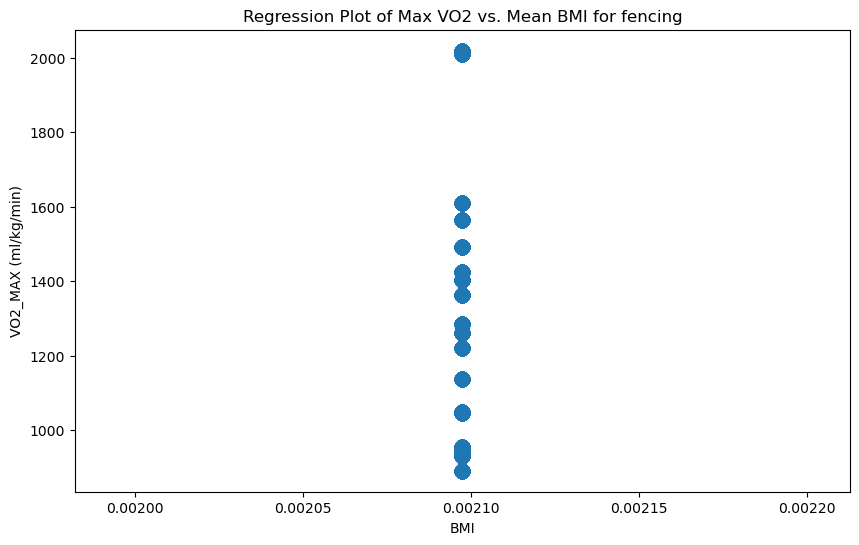

In [501]:
#Load athlete details into the dataframe
fname=pd.DataFrame(ath)

#Merge fname for each id to VO2_all dataframe
VO2_all=phase.merge(fname[['ID','Weight']],on='ID',how='right')

#Sum the VO2 values for each ID
VO2_MAX = VO2_all['VO2'].sum()/VO2_all[ 'Weight']
print(VO2_MAX)

#Filter data for fencing sport
sport_of_choice = 'fencing'
ath_sport= fname[fname['sport'] == sport_of_choice]
#print(ath_sport)
#Calculate BMI for fencing sport
ath_sport['BMI'] = ath_sport['Weight'] / (ath_sport['Height'] ** 2)

#Calculate mean BMI
mean_BMI = ath_sport['BMI'].mean()
#print(mean_BMI)
# Create a DataFrame
df = pd.DataFrame({'BMI': mean_BMI, 'VO2': VO2_MAX })

# Create a regression plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='VO2', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})

# Adding titles and labels
plt.title(f'Regression Plot of Max VO2 vs. Mean BMI for {sport_of_choice}')
plt.xlabel('BMI')
plt.ylabel('VO2_MAX (ml/kg/min)')

# Show plot
plt.show()

## Qn36. Plot the time series of HR( every 5 mins) of athlete 1


0        89.285714
1        89.285714
2        94.936709
3        84.269663
4        68.493151
           ...    
2398    123.966942
2399    126.050420
2400    123.966942
2401    121.951220
2402    121.951220
Name: RR, Length: 2403, dtype: float64
               Timestamp          HR
0    2024-08-21 00:00:00   89.285714
1    2024-08-21 00:05:00   89.285714
2    2024-08-21 00:10:00   94.936709
3    2024-08-21 00:15:00   84.269663
4    2024-08-21 00:20:00   68.493151
...                  ...         ...
2398 2024-08-29 07:50:00  123.966942
2399 2024-08-29 07:55:00  126.050420
2400 2024-08-29 08:00:00  123.966942
2401 2024-08-29 08:05:00  121.951220
2402 2024-08-29 08:10:00  121.951220

[2403 rows x 2 columns]


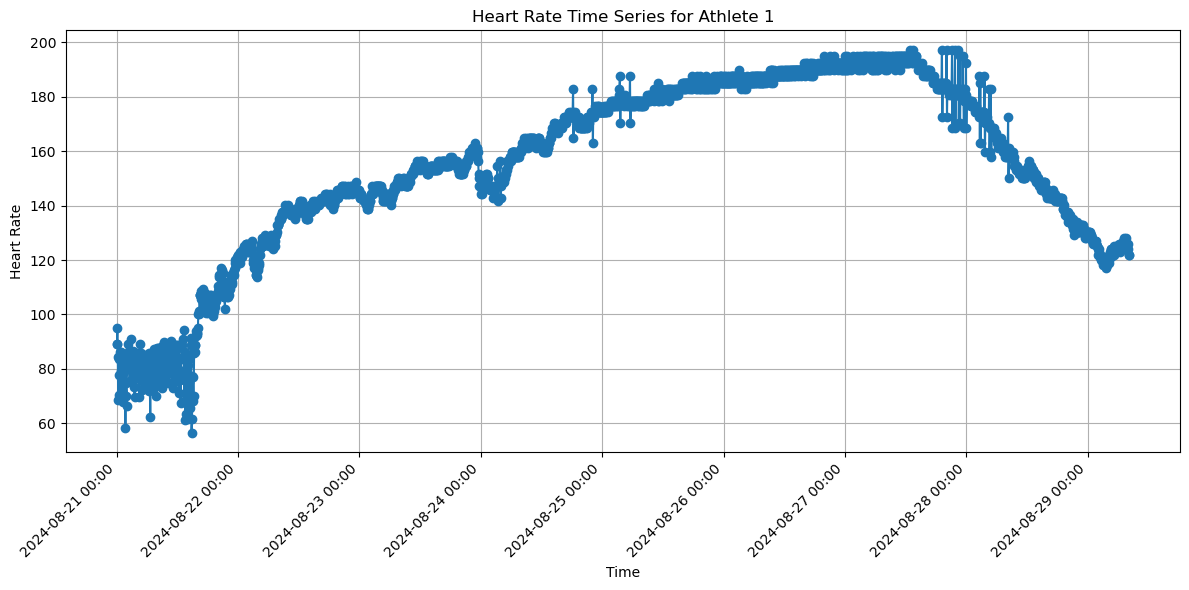

In [469]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates



ath_1 = phase.loc[phase['ID'] == 1]

HR_ath1 = 60/(ath_1['RR']/1000)

print(HR_ath1)
# Create a synthetic timestamp starting from a chosen date/time
start_time =datetime(2024, 8, 21, 0, 0)  # August 21, 2024 at 00:00

time_points = [start_time + timedelta(minutes=5*i) for i in range(len(athlete_1_data))]

# Create a DataFrame
df = pd.DataFrame({'Timestamp': time_points, 'HR': HR_ath1 })

print(df)

df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['HR'], marker="o", linestyle="-")
# Format x-axis to show date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
plt.title('Heart Rate Time Series for Athlete 1')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




##Qn37. What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.


In [180]:
#Initalize dataframe phase
max_power=pd.DataFrame(final_table)
fname=pd.DataFrame(ath)
max_power=max_power.merge(fname[['ID','First Name','Last Name','sport']],on='ID',how='right')

# Find the athlete with maximum power
max_power_row = max_power.loc[max_power['power'].idxmax()]

# Display relevant information
athlete_ID = max_power_row['ID']
first_name = max_power_row['First Name']
last_name = max_power_row['Last Name']
sport = max_power_row['sport']
max_power_watts = max_power_row['power']

print(f"Athlete: {first_name} {last_name}")
print(f"Sport: {sport}")
print(f"Maximum Power (Watts): {max_power_watts:.2f}")

Athlete: Isabella Griffin
Sport: kayak
Maximum Power (Watts): 335.00


##Qn38.What is the average difference in IBI during the warm up Vs the actual test?


In [214]:
#RR interval and inter-beat interval (IBI) are both measurements of time between heartbeats,IBI is essentially the same as the RR interval.
# Calculate average IBI for each phase
avg_warm_up = phase[phase['Phase'] == 'Warm Up']['time'].mean()
avg_get = phase[phase['Phase'] == 'GET']['time'].mean()

# Calculate the difference in IBI in both phases
avg_diff= avg_get - avg_warm_up 

#Print average IBI for both phases and the difference
print(f"Average IBI during Warm-up: {avg_warm_up:.2f} ms")
print(f"Average IBI during Test: {avg_get:.2f} ms")
print(f"Average Difference: {avg_diff:.2f} ms")

Average IBI during Warm-up: -90.06 ms
Average IBI during Test: 512.49 ms
Average Difference: 602.55 ms


##Qn39.Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]


In [92]:
# define the array
array=[1,2,3,4,5,6,7,8,9,10]
indices=[7,10,3]
for index in indices:
    if index < len(array):
        print(f"Element at index {index}: {array[index]}")
    else:
        print(f"Index {index} is out of range.")


Check the index range
Element at index 7: 8
Index 10 is out of range.
Element at index 3: 4


##Qn40. "     [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99"


In [96]:
# Create the given array
arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25],
                [26, 27, 28, 29, 30]])

# Slice the array to get elements 1, 3, and 5 (index 0, 2, and 4)
sliced = arr[:, [0, 2, 4]]

# Replace values less than 4 with 99
value = np.where(sliced < 4, 99, sliced)

print(value)


[[99 99  5]
 [ 6  8 10]
 [11 13 15]
 [16 18 20]
 [21 23 25]
 [26 28 30]]


##Qn41. What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.


In [256]:
# Load athlete details into dataframe
fname=pd.DataFrame(ath)

#Merge fname values to each ID to min_power
min_power=phase.merge(fname[['ID','First Name','Last Name','sport']],on='ID',how='right')

#Calculate wattage at warm up phase 
wattage = min_power[min_power['Phase'] == 'Warm Up']['power'].idxmin()
print(wattage)

0


##Qn42. What was the difference in heart rate between warm up and GET for athlete 1


In [246]:
# Calculate RR value of Athlete 1 at warm up and GET phase
RR_warm_up = phase[(phase['Phase'] == 'Warm Up') & (phase['ID'] == 1)]['time'].mean()
print(f"Average warm up phase RR value for athlete 1: {RR_warm_up:.2f}ms")
RR_get = phase[(phase['Phase'] == 'GET') & (phase['ID'] == 1)]['time'].mean()
print(f"Average GET phase RR value for athlete 1: {RR_get:.2f}ms")

# Calculate the HR for warm up phase and GET phase
HR_warm_up = 60/(RR_warm_up/1000)
print(f"HR for warm up phase of athlete 1: {HR_warm_up:.2f}bpm")

HR_get = 60/(RR_get/1000)
print(f"HR for GET phase of athlete 1: {HR_get:.2f}bpm")

# Calculate the difference in HR for warmup and GET for Athlete 1
diff_HR = HR_get - HR_warm_up
print(f"Difference in HR: {diff_HR:.2f}bpm")




Average warm up phase RR value for athlete 1: -65.86ms
Average GET phase RR value for athlete 1: 359.47ms
HR for warm up phase of athlete 1: -911.03bpm
HR for GET phase of athlete 1: 166.91bpm
Difference in HR: 1077.94bpm


##Qn43. Create a pivot table that shows count of patients within each age group and sport


In [374]:
import pandas as pd



patients = pd.DataFrame(ath)
bins = [12, 13, 14, 15, 16, 17, 18]
labels = ['12', '13', '14', '15', '16', '17', '18']

# Create a pivot table with count of patients
pivot_table = pd.pivot_table(patients, values= 'ID', index='age', columns='sport', aggfunc='count', fill_value=0)

print(pivot_table)


sport  fencing  kayak  triathlon
age                             
12           0      0          2
13           0      2          0
14           2      0          0
15           4      0          0
16           2      1          0
17           2      0          0
18           0      3          0


##Qn44.Display a  distrubution chart of MAX V02 for all athletes


0        1492.157428
1        1492.157428
2        1492.157428
3        1492.157428
4        1492.157428
            ...     
52057    2018.359039
52058    2018.359039
52059    2018.359039
52060    2018.359039
52061    2018.359039
Name: Weight, Length: 52062, dtype: float64


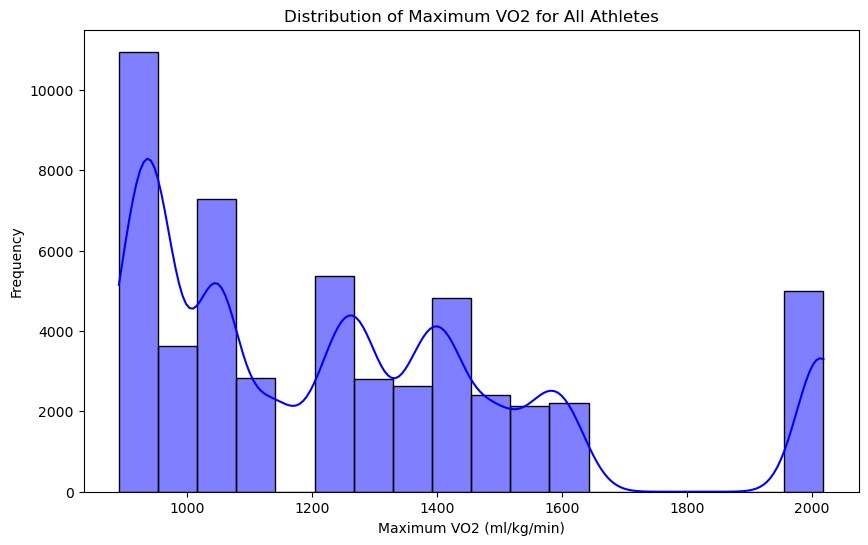

In [388]:
#Load athlete details into the dataframe
fname=pd.DataFrame(ath)

#Merge fname for each id to VO2_all dataframe
VO2_all=phase.merge(fname[['ID','Weight']],on='ID',how='right')

#Sum the VO2 values for each ID
VO2_MAX = VO2_all['VO2'].sum()/VO2_all[ 'Weight']

print(VO2_MAX)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(VO2_MAX, bins=18, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Maximum VO2 for All Athletes')
plt.xlabel('Maximum VO2 (ml/kg/min)')
plt.ylabel('Frequency')

# Show plot
plt.show()

##n45. Create a dummy array with no data with a size of 15.


In [66]:
dummy_array = np.empty(15)

##Qn.46.How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?


In [376]:
# Calculate the exercise time of Athlete 15
#Load athlete details into dataframe
fname=pd.DataFrame(ath)

VO2=phase.merge(fname[['ID','Weight']],on='ID',how='right')
VO2 = VO2.loc[(VO2['ID'] == 15) & (VO2['Phase'] == 'GET')]
VO2_MAX = VO2['VO2'].sum()/VO2[ 'Weight'].mean()
Exec_Time = VO2['time'].sum() /(1000 * 60)
print(f"Total VO2 max of test phase: {VO2_MAX}")
print(f"Excercise time of Athlete 15: {Exec_Time:.2f} minutes")


Total VO2 max of test phase: 56.6426648792126
Excercise time of Athlete 15: 14.62 minutes


##Qn47.Convert ' sport' into a numeric field through Label encoding


In [360]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [362]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
lab = LabelEncoder()

# Assuming you have a DataFrame called 'df'
ath['sport'] = lab.fit_transform(ath['sport'])

print(ath)


    ID  age  Weight  Height  P_vt1  P_vt2  sport  Gender Ethnicity First Name  \
0    1   15    53.7     161     50    140      0  Female   African     Olivia   
1    2   15    56.2     162     80    127      0    Male   African      Ethan   
2    3   16    89.9     191    155    300      0    Male     White    Jackson   
3    4   16    76.5     180    215    275      0    Male     White       Liam   
4    5   17    76.4     186    110    172      0  Female     White        Ava   
5    6   17    65.6     169    131    186      0  Female     White     Sophia   
6    7   15    49.8     165     65    108      0  Female     White      Grace   
7    8   15    51.2     165     80    133      0  Female     White      Aiden   
8    9   14    57.1     176     50    125      0  Female   African      Chloe   
9   10   14    58.8     177    101    162      0  Female   African       Lily   
10  11   18    84.8     182    174    268      1  Female   African   Isabella   
11  12   18    86.0     183 

##Qn48. What was the average age of the athletes?


In [112]:
#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile(r"PythonHackathon/V02Max_Combined.xlsx")
ath = pd.read_excel(df, sheet_name = 'Athletes')

# Calculate the average age
average_age = ath['age'].mean()

print(f"Average age of athletes: {average_age:.2f} years")

Average age of athletes: 15.22 years
